In [14]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the dataset
df = pd.read_csv('population_data.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)



Dataset loaded successfully!
Shape: (306, 7)


In [6]:
 # Explore the Data

df = pd.read_csv("population_data.csv")
print("Dataset Loaded!")
print("Shape:", df.shape)
print(df.head())
print(df.info())
print("Columns:", df.columns)
print(df["POPESTIMATE2023"].describe())

Dataset Loaded!
Shape: (306, 7)
  GENDER  AGE  ESTIMATESBASE2020  POPESTIMATE2020  POPESTIMATE2021  \
0   MALE    0            3734587          3702966          3572165   
1   MALE    1            3777056          3764198          3708490   
2   MALE    2            3873233          3853792          3770533   
3   MALE    3            3966159          3933140          3859993   
4   MALE    4            4049207          4037779          3939127   

   POPESTIMATE2022  POPESTIMATE2023  
0          3673267          3648654  
1          3590762          3694222  
2          3727276          3611883  
3          3788899          3747807  
4          3877538          3808594  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GENDER             306 non-null    object
 1   AGE                306 non-null    int64 
 2   ESTIMATESBASE2020  306

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
GENDER               0
AGE                  0
ESTIMATESBASE2020    0
POPESTIMATE2020      0
POPESTIMATE2021      0
POPESTIMATE2022      0
POPESTIMATE2023      0
dtype: int64


In [8]:
# Data Cleaning

df_clean = df[["GENDER", "AGE", "POPESTIMATE2023"]]
df_clean = df_clean[df_clean["POPESTIMATE2023"] > 0]
df_clean = df_clean[(df_clean["AGE"] >= 0) & (df_clean["AGE"] <= 100)]
print("After cleaning:", df_clean.shape)

After cleaning: (303, 3)


In [49]:
# Gender distribution
gender_dist = df_clean[df_clean["GENDER"].isin(["MALE", "FEMALE"])]
gender_dist = gender_dist.groupby("GENDER")["POPESTIMATE2023"].sum()
print("Gender distribution:\n", gender_dist)

# Age distribution
age_dist = df_clean[df_clean["GENDER"].isin(["MALE", "FEMALE"])]
age_dist = age_dist.groupby("AGE")["POPESTIMATE2023"].sum()
print("Age distribution (first 10):\n", age_dist.head(10))

# Bins and labels for age groups
bins = [0,10,20,30,40,50,60,70,80,90,101]
labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

# Age group distribution
age_group = df_clean[df_clean["GENDER"].isin(["MALE","FEMALE"])].copy()
age_group["AGE_GROUP"] = pd.cut(age_group["AGE"], bins=bins, labels=labels, right=False)
age_group_dist = age_group.groupby("AGE_GROUP", observed=True)["POPESTIMATE2023"].sum()
print("Age group distribution:\n", age_group_dist)


Gender distribution:
 GENDER
FEMALE    202074313
MALE      467755477
Name: POPESTIMATE2023, dtype: int64
Age distribution (first 10):
 AGE
0    7297308
1    7388444
2    7223766
3    7495614
4    7617188
5    7792154
6    7945994
7    8151116
8    8220996
9    8195254
Name: POPESTIMATE2023, dtype: int64
Age group distribution:
 AGE_GROUP
0-9      77327834
10-19    85820088
20-29    87659064
30-39    92061600
40-49    83402118
50-59    82566056
60-69    80797764
70-79    53843946
80-89    21574396
90+       4776924
Name: POPESTIMATE2023, dtype: int64


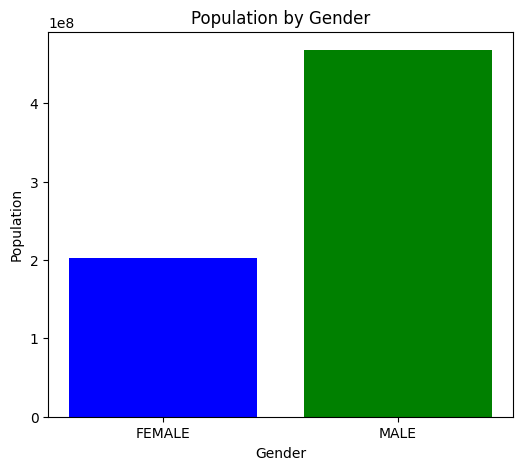

In [23]:

# Bar Chart: Gender Distribution
plt.figure(figsize=(6,5))
plt.bar(gender_dist.index, gender_dist.values, color=["blue","green"])
plt.title("Population by Gender")
plt.xlabel("Gender")
plt.ylabel("Population")
plt.show()



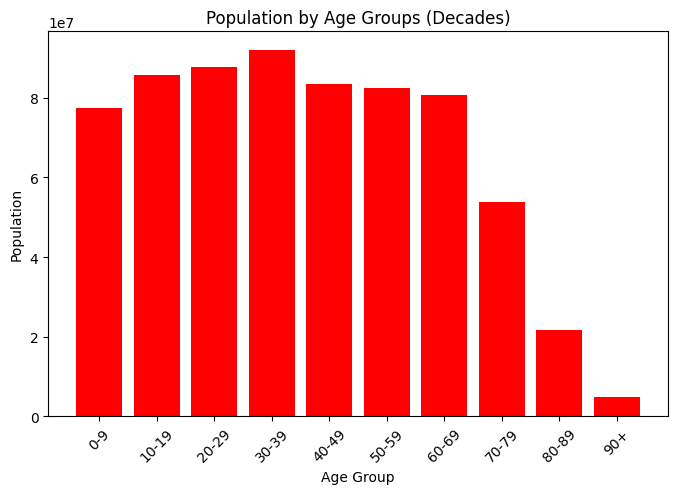

In [24]:
# Bar Chart: Age Distribution
plt.figure(figsize=(8,5))
plt.bar(age_group_dist.index.astype(str), age_group_dist.values, color="red")
plt.title("Population by Age Groups (Decades)")
plt.xlabel("Age Group")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()

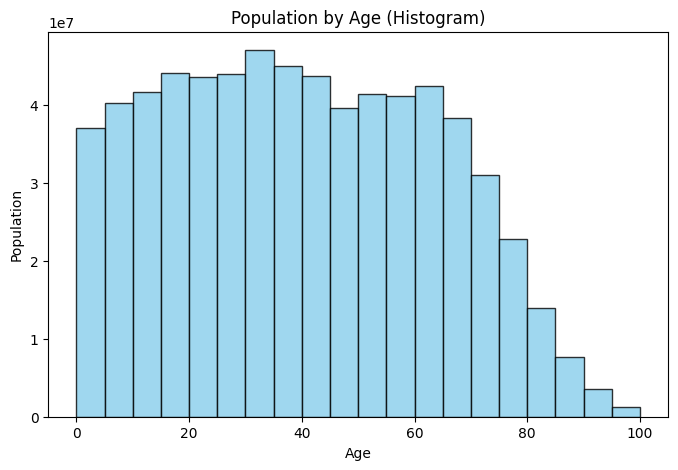

In [19]:
# Histogram – Age Distribution
plt.figure(figsize=(8,5))
plt.hist(age_dist.index,weights=age_dist.values,bins=20,color='skyblue',edgecolor="black",alpha=0.8)
plt.title("Population by Age (Histogram)")
plt.xlabel("Age")
plt.ylabel("Population")
plt.show()

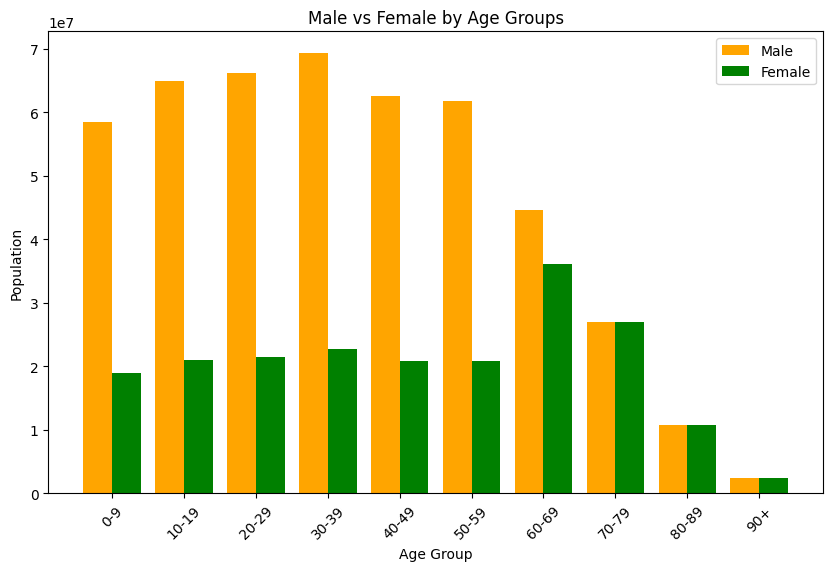

In [50]:
# Grouped Bar chart – Male vs Female by Age Group
df_clean["AGE_GROUP"] = pd.cut(df_clean["AGE"], bins=bins, labels=labels, right=False)
age_gender = df_clean.groupby(["AGE_GROUP", "GENDER"], observed=True)["POPESTIMATE2023"].sum().unstack()
x = np.arange(len(labels))
w = 0.4
plt.figure(figsize=(10,6))
plt.bar(x-w/2, age_gender["MALE"], width=w, label="Male", color="orange")
plt.bar(x+w/2, age_gender["FEMALE"], width=w, label="Female", color="green")
plt.xticks(x, labels, rotation=45)
plt.title("Male vs Female by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Population")
plt.legend()
plt.show()
